# The Medical Appointment No Shows
### Why do 30% of patients miss their scheduled appointments?

# 1- Gathering data

In [229]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# 2- Access

In [230]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [231]:
df.shape

(110527, 14)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [233]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [234]:
#check duplacted values 
sum(df.duplicated())

0

In [235]:
#check nan values 
df.isnull().sum().all()

False

In [236]:
#check dduplicated rows
sum(df.PatientId.duplicated())

48228

In [237]:
# check the duplicated IDs (the patients are frequent to doctors)
id_duplicate = df[df.PatientId.duplicated() == True]
id_duplicate.PatientId.value_counts()

8.221459e+14    87
9.963767e+10    83
2.688613e+13    69
3.353478e+13    64
6.264199e+12    61
                ..
2.539324e+14     1
5.677162e+11     1
2.154335e+09     1
5.118325e+13     1
3.775115e+14     1
Name: PatientId, Length: 24379, dtype: int64

In [238]:
# check if there are ages less than zero
df[df.Age <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [239]:
# check the unique values of some columns
col=['Gender', 'Age',
        'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for i in col:
    print(f"unique values of columns {i} are :{df[i].unique()}\n")


unique values of columns Gender are :['F' 'M']

unique values of columns Age are :[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]

unique values of columns Scholarship are :[0 1]

unique values of columns Hipertension are :[1 0]

unique values of columns Diabetes are :[0 1]

unique values of columns Alcoholism are :[0 1]

unique values of columns Handcap are :[0 1 2 3 4]

unique values of columns SMS_received are :[0 1]

unique values of columns No-show are :['No' 'Yes']



# Quality

- Some column-names should be changed (AppointmentID --> appointment_id ,ScheduledDay --> scheduled_day ...).

- PatientId should be intger dtype (12 14 num).

- Set patientid as index.

- ScheduledDay should be datetime in format %y-%m-%d %H:%M:%S

- AppointmentDay should be datetime "%y-%m-%d"

- make a day difference between appointment_day and scheduled_day.

- There is patient whose age equal -1 will be moved to a separate dataframe.

# 3- Cleaning

In [240]:
# rename some columns 
df.rename(columns={"PatientId":"patient_id","AppointmentID":"appointment_id","ScheduledDay":"scheduled_day"
                   ,"AppointmentDay":"appointment_day","No-show":"no_show"},inplace=True)
df.columns = df.columns.str.lower()

In [241]:
# test columns name  
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [242]:
#  convert Patient_Id into intger 
df.patient_id = df.patient_id.astype(np.int64)
df.patient_id.dtype

dtype('int64')

In [243]:
# make patient_id  as index and drop duplicated colunm
df = df.set_index(df.patient_id)
df = df.drop('patient_id',axis=1)

In [244]:
# set gender male instead of M and female instead of F 

df.gender = df.gender.apply(lambda male : male.replace("M","male"))
df.gender = df.gender.apply(lambda female : female.replace("F","female"))
df.gender.unique()

array(['female', 'male'], dtype=object)

In [245]:
## split appointment_day to only date  and convert it into to datetime  
df.appointment_day = df.appointment_day.apply(lambda x : x.split('T')[0])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [246]:
# split scheduled_day to day and time :
df.scheduled_day = df.scheduled_day.apply(lambda x : x.split('T')[0])

# convert scheduled_day to datatime :
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

# day_difference between appointment_day and scheduled_day :
df['day_difference'] =  df['appointment_day'] - df['scheduled_day'] 
df['day_difference'] = df.day_difference.astype(str).apply(lambda x :x.split(' ')[0]).astype(int)
df.insert(6,"day_difference",df.pop("day_difference"))

## check change: 
df.tail()

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,day_difference,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
patient_id,,,,,,,,,,,,,,
2572134369293,5651768,female,2016-05-03,2016-06-07,56,MARIA ORTIZ,35,0,0,0,0,0,1,No
3596266328735,5650093,female,2016-05-03,2016-06-07,51,MARIA ORTIZ,35,0,0,0,0,0,1,No
15576631729893,5630692,female,2016-04-27,2016-06-07,21,MARIA ORTIZ,41,0,0,0,0,0,1,No
92134931435557,5630323,female,2016-04-27,2016-06-07,38,MARIA ORTIZ,41,0,0,0,0,0,1,No
377511518121127,5629448,female,2016-04-27,2016-06-07,54,MARIA ORTIZ,41,0,0,0,0,0,1,No


In [247]:
# test change :
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 29872499824296 to 377511518121127
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   appointment_id   110527 non-null  int64         
 1   gender           110527 non-null  object        
 2   scheduled_day    110527 non-null  datetime64[ns]
 3   appointment_day  110527 non-null  datetime64[ns]
 4   age              110527 non-null  int64         
 5   neighbourhood    110527 non-null  object        
 6   day_difference   110527 non-null  int32         
 7   scholarship      110527 non-null  int64         
 8   hipertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handcap          110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dty

In [248]:
# change the age -1 of patient to 0 
df.drop(465943158731293, inplace=True)

# 4- Explore the dataset :

In [249]:
## This function is to write labels on axis.

def write_text_on_axis(xlabel,ylabel,title): 
    """ this functios is used to take 
     (str)  xlabel  string to write it on x-axis of plot 
     (str)  ylabel  string to write it on y-axis of plot 
     (str)  title   string to make it as title of plot 
    
    """
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel,fontsize=13)
    plt.title(title)

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [250]:
show_up_data = df.query("no_show =='No'")
show_up_data.describe().round(3) # get describe of different factor related to no show

,appointment_id,age,day_difference,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000,88207.000
mean,5681135.438,37.791,8.755,0.094,0.204,0.074,0.030,0.023,0.291
std,69311.926,23.339,14.550,0.292,0.403,0.262,0.172,0.163,0.454
min,5030230.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5646217.500,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,5685683.000,38.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,5731077.500,56.000,12.000,0.000,0.000,0.000,0.000,0.000,1.000
max,5790484.000,115.000,179.000,1.000,1.000,1.000,1.000,4.000,1.000


In [251]:
# Summary of patient's age :

In [252]:
# describe of ages
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

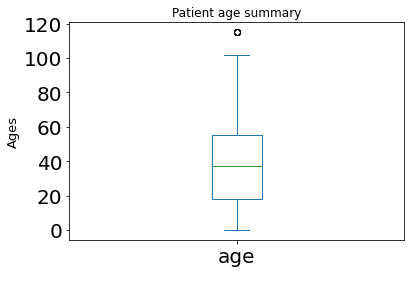

In [253]:
df.age.plot(kind="box",fontsize=20) # to draw age summary as box plot 
write_text_on_axis(" ","Ages","Patient age summary") 

- The range of ages from __0 to 102__ years old. And the average age is about __38 years__.

### What is the life stage have maximum number of patients?

Spliting  __age__  into life stage according to that :
- Infant = 0-1 year
- Toddler = 2-4 yrs
- Child = 5-12 yrs
- Teen = 13-19 yrs
- Adult = 20-39 yrs
- Middle Age Adult = 40-59 yrs
- Senior Adult = 60+

In [254]:
# Columns identify the life stage of patient
bins=[0,1,4,12,19,39,59,102] 
labels=["Infant","Toddler","Child","Teen","Adult","Middle Age Adult","Senior Adult"]
df.insert(5,"life_stage",pd.cut(df.age, bins=bins, labels=labels,include_lowest=True))

In [255]:
df.groupby("patient_id").count().sort_values(by="appointment_id")

,appointment_id,gender,scheduled_day,appointment_day,age,life_stage,neighbourhood,day_difference,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
patient_id,,,,,,,,,,,,,,,
39217,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
52935456929325,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
52952868183536,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
52957198984263,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
52965818364153,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75797461494159,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
33534783483176,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
26886125921145,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70


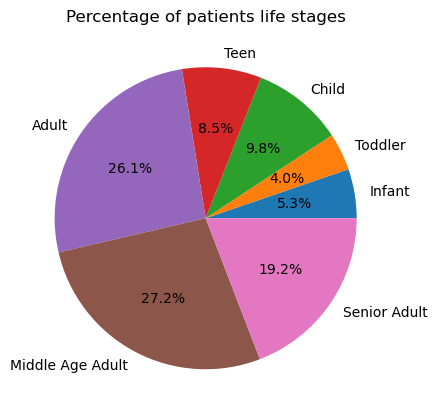

In [256]:
plt.figure(figsize=(5,5),dpi=100)
AGE_lifstyle=df.groupby("life_stage").count()["appointment_id"]  # to get num of life stage in every data 
plt.pie(AGE_lifstyle, labels=labels, autopct="%.1f%%");  # to make pie plot
plt.title("Percentage of patients life stages");

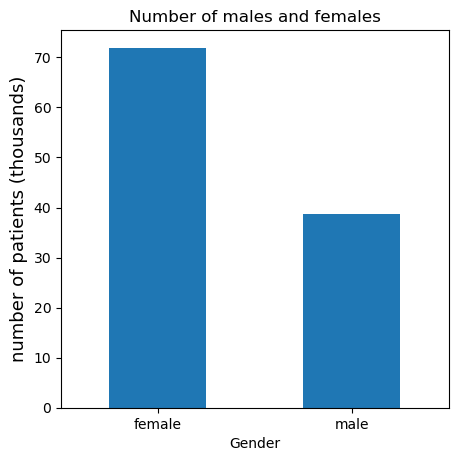

In [257]:
plt.figure(figsize=(5,5),dpi=100)
a = df.gender.value_counts()/1000
a.plot(kind='bar',rot=0);

write_text_on_axis("Gender","number of patients (thousands)","Number of males and females")

### What is the relationship between different diseases and patients life stage?
                ('hipertension', 'diabetes', 'alcoholism', 'handcap')

In [258]:
def illnes_and_life_style(illness): 
    
    ''' 
    plots relation of illness and life stage?
    this function  is used for get data of patients
    disease to get the percentage  
    of patients with it and patients without it  for each life stage then draw a bar chart for this
    
    
    (str) illness     string of  illness to get the percentage  of patients with it  and patients without it 
    ''' 
    temp = df.copy()                        # get copy of dataframe  for not modifing the  orginal data
    temp[f"has {illness}"]=df[illness]!=0   # make a columns to check the patiens have specific disease or not 
    
    # get the precentage of each life stage have specific disease  and precentage of not having 
    illness_num_lifestage=temp.groupby("life_stage")[f"has {illness}"].value_counts(normalize=True).mul(100).unstack() 
    # make a bar chart between lif stage and precentage 
    illness_num_lifestage.plot.bar(edgecolor="black",rot=0,width=.8,stacked=True,figsize=[14,4])
    # to write good strings on axis xlabel andd ylabel and title 
    write_text_on_axis("life stage","percentage",f"Life stages of {illness} patients") 

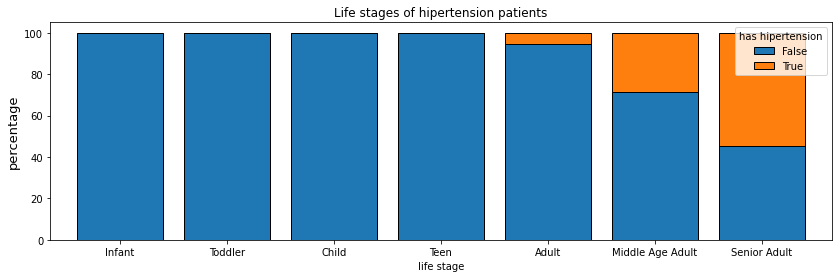

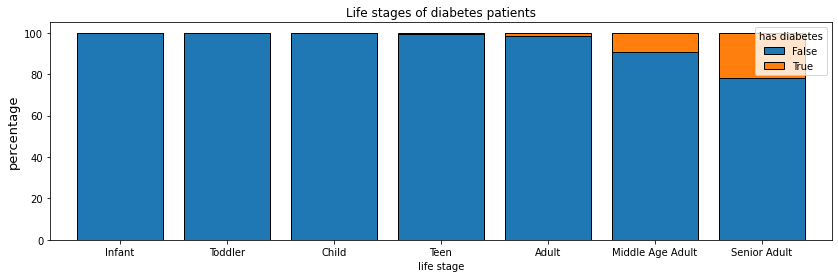

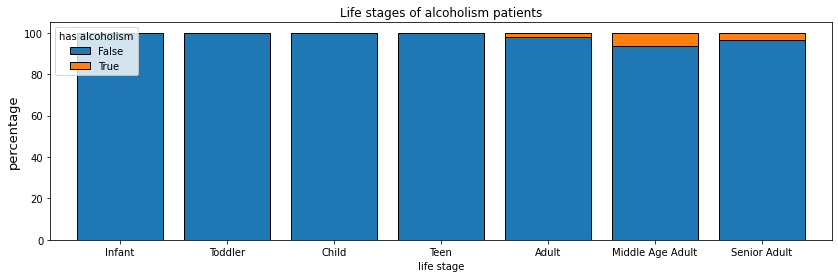

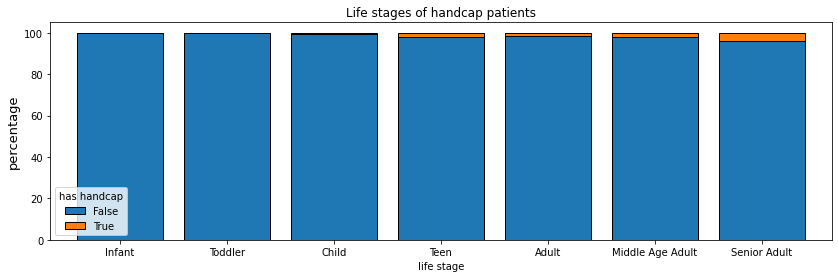

In [259]:
# to find the relation among every diseases and life stage.

for i in ['hipertension', 'diabetes', 'alcoholism', 'handcap']: 
    illnes_and_life_style(i)

### Is there a relationship between age of patient and enrollment in Brasilian welfare program Bolsa Família? 

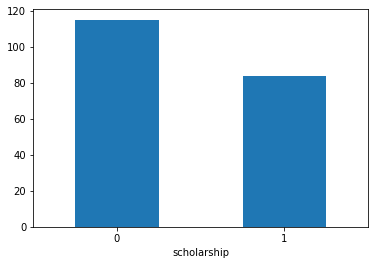

In [260]:
df.groupby('scholarship')['age'].max().plot(kind='bar',rot=0);

- We notice that all patients enrolled in the Brasilian welfare program Bolsa Família are younger than 84 years old. 

### Are there any males or females had all diseases ? if yes, How many males and female have all diseases?

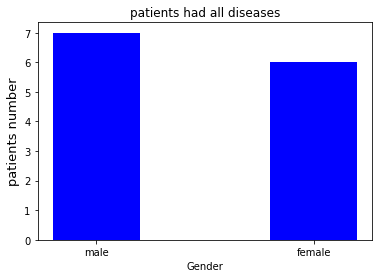

In [261]:
# make query to get gender have all illness :
pat_have_all=df.query("handcap>0 and alcoholism >0 and diabetes>0 and hipertension > 0 ") 
pat_have_all_count=pat_have_all.gender.value_counts() # get the counts femles and males  
plt.bar(pat_have_all_count.index,pat_have_all_count.values,width=.4,color=["blue"]);
 # to write good strings on axis xlabel andd ylabel and title 
write_text_on_axis("Gender","patients number","patients had all diseases")

- There are about __7__ of males & __6__ of females have all diseases. 

 ### Is the scholarship related with a specific patients feature or even an illness?

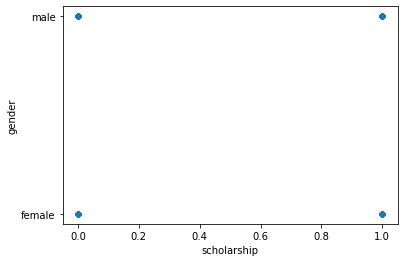

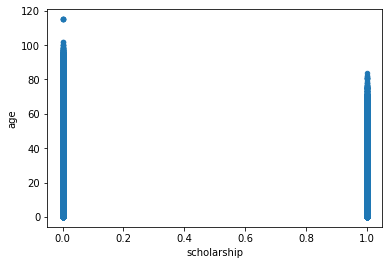

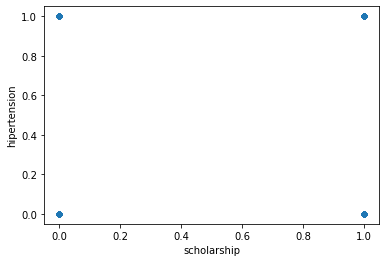

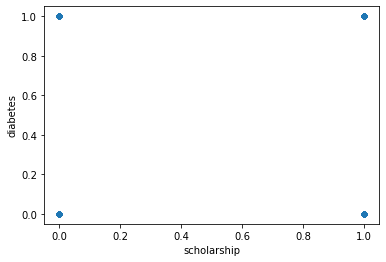

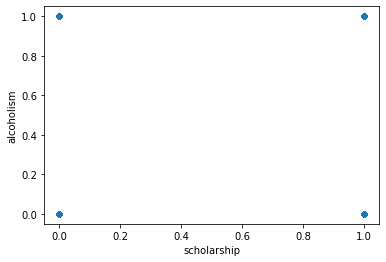

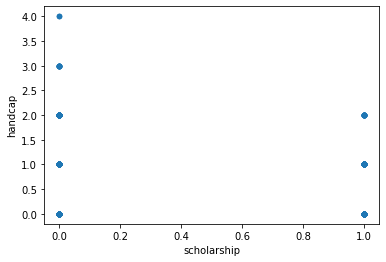

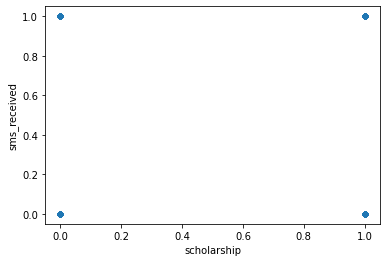

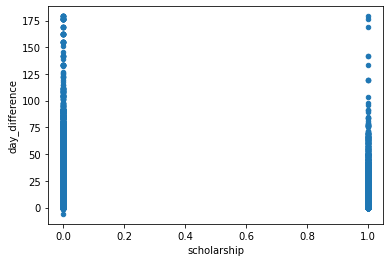

In [262]:
dd = df.query('scholarship == 1')
for i in ['gender', 'age', 'hipertension','diabetes','alcoholism','handcap','sms_received','day_difference']:
     df.plot(x='scholarship', y=i , kind = 'scatter');

- Contrary to expected, scatter plots above  show that the scholarship is completely unrelated to any specific feature of patients.

### What is the ratio of people attending and missing appointment?

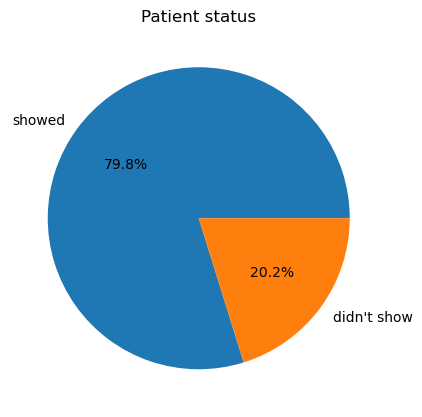

In [263]:
plt.figure(dpi=100);
b = df.no_show.value_counts()
b.index = ['showed', "didn't show"]
b.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), title='Patient status', label='');

### Does waiting time interval have any affect on people showing up for appointment?

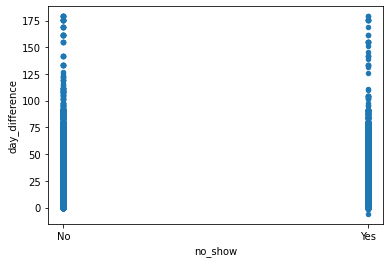

In [264]:
df.plot(x='no_show', y='day_difference', kind='scatter');

# no correlation, waiting time has no affect on showing up to appointment .


- According to analysis, there is no correlation between waiting time and patient showing up their appointment.

### Is sms recieved related with a specific diesease?

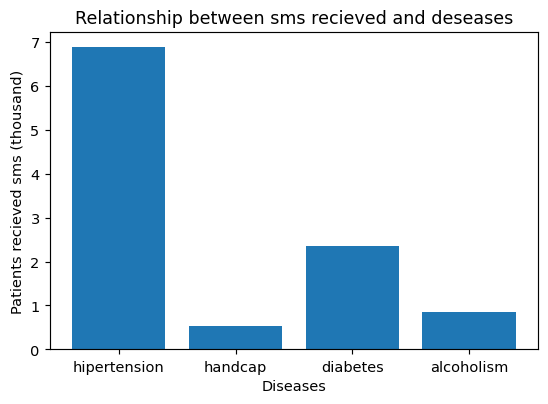

In [265]:
plt.figure(dpi=105);
hyper_sms = df.query("sms_received>0 and hipertension>0 ").hipertension.count()/1000
handcap_sms = df.query("sms_received > 0 and handcap>0 ").handcap.count()/1000
diabet_sms =  df.query("sms_received>0 and diabetes>0 ").sms_received.count()/1000
alco_sms = df.query("sms_received>0 and alcoholism>0").alcoholism.count()/1000
plt.bar(['hipertension' , 'handcap' , 'diabetes' , 'alcoholism'], [hyper_sms , handcap_sms ,diabet_sms , alco_sms]);
plt.title("Relationship between sms recieved and deseases");
plt.xlabel("Diseases");
plt.ylabel("Patients recieved sms (thousand)");

## let's focus on the patients who missed their scheduled appointments :

In [266]:
# get new dataframe with people who missed their appointment 
df_no_show = df[df['no_show'] == 'Yes']
df_no_show = df_no_show.reset_index()
df_no_show.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,life_stage,neighbourhood,day_difference,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,733688164476661,5630279,female,2016-04-27,2016-04-29,23,Adult,GOIABEIRAS,2,0,0,0,0,0,0,Yes
1,3449833394123,5630575,female,2016-04-27,2016-04-29,39,Adult,GOIABEIRAS,2,0,0,0,0,0,0,Yes
2,7542951368435,5620163,male,2016-04-26,2016-04-29,29,Adult,NOVA PALESTINA,3,0,0,0,0,0,1,Yes
3,14794966191172,5633460,female,2016-04-28,2016-04-29,40,Middle Age Adult,CONQUISTA,1,1,0,0,0,0,0,Yes
4,622257462899397,5626083,female,2016-04-27,2016-04-29,30,Adult,NOVA PALESTINA,2,0,0,0,0,0,0,Yes


### What percentages of males and females missed appointments?

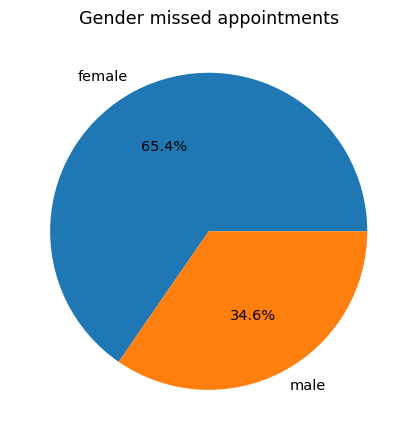

In [267]:
plt.figure(dpi=105);
df_no_show.gender.value_counts().plot(kind='pie', label = '' ,
                         title = 'Gender missed appointments',autopct="%.1f%%", figsize=(5,5));


- Female patients seem to be missing their appointments more than males, which is predicted because the number of females is almost twice that of males in all the dataset.

### When, month and week-day, do they miss their appointments?

In [268]:
df_no_show['month_name'] = df_no_show['scheduled_day'].dt.month_name()
df_no_show['month_name']

0        April
1        April
2        April
3        April
4        April
         ...  
22314     June
22315     June
22316     June
22317     June
22318     June
Name: month_name, Length: 22319, dtype: object

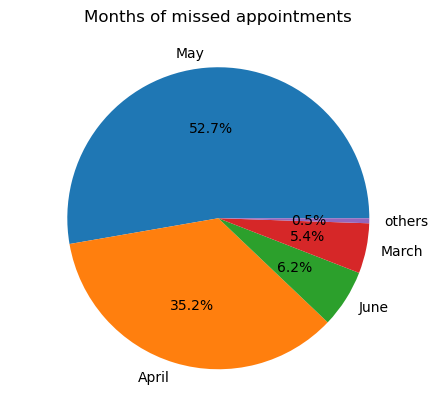

In [269]:
df_no_show['week_day'] = df_no_show.month_name.apply(lambda x:x if x in ['April', 'March','May','June' ] else "others")
plt.figure(dpi=100)
df_no_show.week_day.value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(5,5), label = ' ',title='Months of missed appointments');


- Maybe people in __Brazil__ are so busy in __May__ and __April__ that they missed their scheduled appointments.

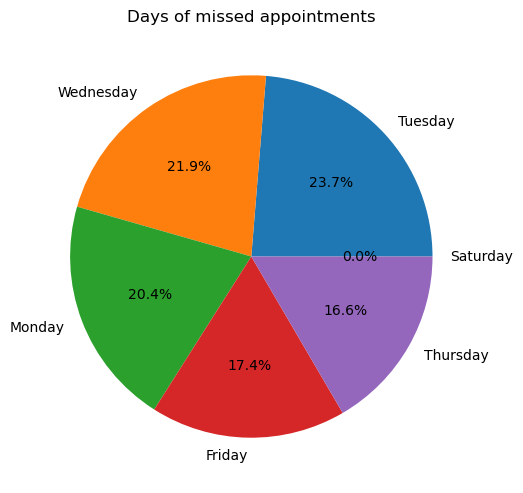

In [270]:
plt.figure(dpi=100)
df_no_show['scheduled_day'].dt.day_name().value_counts().plot(kind='pie', label='', autopct='%1.1f%%', figsize=(6,6), title='Days of missed appointments');
# weekend: saturday, sunday
# almost no one cancels appointment on weekend

- In Brazil, the weekend is Saturday and Sunday when there are almost no canceled appointments on weekends.

### What maximum and minimum appointment month patients have an appointment in hostpital? Which hospital has maximum number of appointments that day?


In [271]:
df['month_show'] = df['scheduled_day'].dt.month_name()
month_count = df.month_show.value_counts()
print(f"The most crowded month is {month_count.idxmax()} which has {month_count.max()} visits.")

The most crowded month is May which has 67421 visits.


In [272]:
a = df.groupby(["month_show","neighbourhood"]).count().sort_values(by="appointment_id")[-1:].index
print(f"The most crowded neighbourhood is {a[0][1]}.")

The most crowded neighbourhood is JARDIM CAMBURI.


### Is there a relationship between age of patient and enrollment in Brasilian welfare program Bolsa Família?

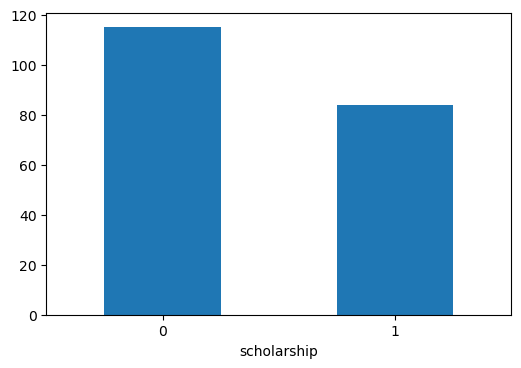

In [273]:
plt.figure(dpi=100)

df.groupby('scholarship')['age'].max().plot(kind='bar',rot=0);

- All patients enrolled in the Brasilian welfare program __Bolsa Família__ are younger than __84__ years old.

# Findings: 
   This dataset collects information from __100k__ medical appointments in Brazil. It provide us information about patient ID, Gender of patient (Male or Female), the day patient registered an appointment(Scheduled day),the day when patient have to visit the doctor(Appointment day), Age of patient , Neighbourhood (where patient will visit doctor ) , Scholarship (indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.) , chornic Diseases (hypertension , diabetes , handcap , alcoholism).

        from expoloring data , we found that 71,839(about 65%) from patients are female and other are male (38,687).Age of patients range from 0 and 115. Average age is about 38 years old. We split age into groups, about 27.2% of patients are middle age adult( 40-59 y), 26.1 % are adult(20-39 y) and 19.2% are senior adult(60+) and about 27.6% are less than 18 year old. we exclude patient with age -1 from analysis , and patient with age 115 (outlier).
Contrary to expected ,the scholarship is completely unrelated to any specific feature of patients. Maybe, it is related with financial status of patient. 79.8% from total patients showed up to their appointment, only 20.2% did not show up their appointment.  

The most disease is more common among patients _specially senior adult_ is __Hypertension__, then diabetes and alcoholism but the last is more common among middle age adult.  

About __21%__ of patients who showed up thier appointment went more than once. there are __7__ males and __6__ females had all chornic diseases.and that mean, they are about to die. Also we found that SMS recieved by patients is more common among people with __Hypertension.__ it may be related with this specific diseases only or may be not, I think it is not related with hypertension because this disease is more common among patients than others.

It's important to discuss the neighbourhood and explore when and where it's more crowded to be solved later. Firstly , we found that the day of 2016-06-6 have maximum number of appointments, it is about 4692. the neighbourhood had maximum capacity is Jardim Camburi. The most month had a pressure in hospitals was May with precentage about 72.6% so, we think that number of people who work in hosiptal should be increased.

Finally, We found that average of waiting time of people who did not show for their appointment is more than waiting time of 
patients showing up.All patients enrolled in the Brasilian welfare program Bolsa Família are younger than 84 years old.
